In [38]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.preprocessing import StandardScaler
from os import listdir
from os.path import isfile, join,isdir
import string
from PIL import Image
import cv2
from sklearn.decomposition import PCA
from datetime import datetime
#import Tkinter, Tkconstants, tkFileDialog

DENOISING IMAGE

http://docs.opencv.org/3.0-beta/modules/photo/doc/denoising.html

In [39]:
#Funkcija kao ulaz uzima grayscale sliku a kao izlaz daje grayscale slike
def denoise(image):
    #Parametri funkcije su ulazna slike, h=3 - regulira snagu filtra, velicina prozora,
    # te velicina search prozora - Size in pixels of the window that is used to compute weighted average for given pixel. 
    #Should be odd. Affect performance linearly: greater searchWindowsSize - greater denoising time. 
    #Recommended value 21 pixels
    output=cv2.fastNlMeansDenoising(image,3,7,21)
    return output

BINARISATION

In [40]:
def binarize(img):
    # convert the image to grayscale and flip the foreground
    # and background to ensure foreground is now "white" and
    # the background is "black"
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    gray = cv2.bitwise_not(gray)
    #http://docs.opencv.org/3.1.0/d5/daf/tutorial_py_histogram_equalization.html
    ##KORISTI SE LOKALNO IZJEDNACANJE HISTOGRAMA
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
    cl1 = clahe.apply(gray)

    # threshold the image, setting all foreground pixels to
    # 255 and all background pixels to 0
    thresh = cv2.threshold(cl1, 0, 255,cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]
    thresh = cv2.bitwise_not(thresh)
    return cl1,thresh

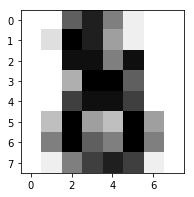

(8L, 8L)
(898L, 64L)
(898L,)


In [41]:
#Load the digits dataset
digits = datasets.load_digits()

#Display the first digit
plt.figure(1, figsize=(3, 3))
plt.imshow(digits.images[-1], cmap=plt.cm.gray_r, interpolation='nearest')
plt.show()
print digits.images[-1].shape
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))
print data[:n_samples / 2].shape
print digits.target[:n_samples / 2].shape

In [5]:
#SEARCH FOLDERS FOR DATA AND PREPARE FOR OUTPUT DATA
#path = tkFileDialog.askdirectory(initialdir='.')
pathNoText = './Database_text_nonText/nonText'
pathText = './Database_text_nonText/text'
onlydirs = [f for f in listdir(pathText) if isdir(join(pathText, f))]
print onlydirs
numbers = range(0,10)
upperLetters = list(string.ascii_uppercase)
lowerLetters = list(string.ascii_lowercase)
theList = numbers+upperLetters+lowerLetters
lengthsOfOutputs={}

['sample001', 'sample002', 'sample003', 'sample004', 'sample005', 'sample006', 'sample007', 'sample008', 'sample009', 'sample010', 'sample011', 'sample012', 'sample013', 'sample014', 'sample015', 'sample016', 'sample017', 'sample018', 'sample019', 'sample020', 'sample021', 'sample022', 'sample023', 'sample024', 'sample025', 'sample026', 'sample027', 'sample028', 'sample029', 'sample030', 'sample031', 'sample032', 'sample033', 'sample034', 'sample035', 'sample036', 'sample037', 'sample038', 'sample039', 'sample040', 'sample041', 'sample042', 'sample043', 'sample044', 'sample045', 'sample046', 'sample047', 'sample048', 'sample049', 'sample050', 'sample051', 'sample052', 'sample053', 'sample054', 'sample055', 'sample056', 'sample057', 'sample058', 'sample059', 'sample060', 'sample061', 'sample062']


In [6]:
#IMPORT NONTEXT PICTURES
theDatasetNoText = np.array([])
allInDir=listdir(pathNoText)
#print np.array(path+'/'+subdir+'/'+allInDir)
#print np.array(allInDir)
lengthsOfOutputs['NoText']=len(allInDir)
for it,elem in enumerate(allInDir):
    if(it%1000==0):
        print it
    localCharPath = pathNoText+'/'+elem
    im = Image.open(localCharPath)
    im = np.asarray(im)
    #b = np.hstack((im,np.array(character)))
    if len(im.shape)>2:
            _,im = binarize(im)
    im = cv2.resize(im, (32, 32))
    if len(theDatasetNoText)!=0:
        theDatasetNoText = np.vstack((theDatasetNoText,im))
    else:
        theDatasetNoText = im
print len(theDatasetNoText)

0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000
24000
25000
26000
27000
28000
29000
30000
31000
32000
33000
34000
35000
36000
37000
38000
39000
40000
41000
42000
43000
44000
45000
46000
47000
48000
49000
50000
51000
52000
53000
54000
55000
56000
57000
58000
59000
60000
61000
62000
63000
64000
65000
66000
67000
68000
69000
70000
71000
72000
73000
74000
75000
2400032


In [7]:
print len(theDatasetNoText[0].shape)
print theDatasetNoText[0]
#plt.imshow(theDatasetNoText[0],'gray')
#plt.show()

1
[255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
 255 255 255 255 255 255 255 255 255 255 255 255 255 255]


print len(allInDir)
lengthsOfOutputs['NoText']=len(allInDir)
Filename = './DatotekaNoText'
File = open(Filename,'w')
File.write(theDatasetNoText)
File.close()

In [8]:
#IMPORT PICTURES AND GET DATA AS NP ARRAY
theDatasetText = np.array([])
for subdir,character in zip(onlydirs,theList):
    print pathText+'/'+subdir
    allInDir=listdir(pathText+'/'+subdir)
    #print np.array(pathText+'/'+subdir+'/'+allInDir)
    #print np.array(allInDir)
    lengthsOfOutputs['Text']=len(allInDir)
    for it,elem in enumerate(allInDir):
        if(it%200==0):
            print it
        localCharPath = pathText+'/'+subdir+'/'+elem
        im = Image.open(localCharPath)
        im = np.asarray(im)
        #b = np.hstack((im,np.array(character)))
        if len(im.shape)>2:
                _,im = binarize(im)
        #print im.shape
        prop = cv2.resize(im, (32, 32))
        #print prop.shape
        if len(theDatasetText)!=0:
            theDatasetText = np.vstack((theDatasetText,prop))
        else:
            theDatasetText = prop
print len(theDatasetText)
print theDatasetText[0].shape

./Database_text_nonText/text/sample001
0
200
400
600
800
1000
./Database_text_nonText/text/sample002
0
200
400
600
800
1000
./Database_text_nonText/text/sample003
0
200
400
600
800
1000
./Database_text_nonText/text/sample004
0
200
400
600
800
1000
./Database_text_nonText/text/sample005
0
200
400
600
800
1000
./Database_text_nonText/text/sample006
0
200
400
600
800
1000
./Database_text_nonText/text/sample007
0
200
400
600
800
1000
./Database_text_nonText/text/sample008
0
200
400
600
800
1000
./Database_text_nonText/text/sample009
0
200
400
600
800
1000
./Database_text_nonText/text/sample010
0
200
400
600
800
1000
./Database_text_nonText/text/sample011
0
200
400
600
800
1000
1200
1400
1600
./Database_text_nonText/text/sample012
0
200
400
600
800
1000
./Database_text_nonText/text/sample013
0
200
400
600
800
1000
1200
./Database_text_nonText/text/sample014
0
200
400
600
800
1000
1200
./Database_text_nonText/text/sample015
0
200
400
600
800
1000
1200
1400
./Database_text_nonText/text/sample

In [9]:
theDataset = np.vstack((theDatasetNoText,theDatasetText))
print len(theDataset)

4771456


Filename = './DatotekaText'
File = open(Filename,'w')
File.write(theDatasetText)
File.close()

#OPEN DATASET
Filename = './DatotekaNoText'
File = open(Filename,'rb')
theDataset2 = File.read()
File.close()


In [10]:
#theDataset2 = theDataset
print len(theDataset)

4771456


In [11]:
#SAVE DATA TO FILE
"""
Filename = 'C:\Users\Franjo\Documents\FER\Diplomski\Digitalna obrada i analiza slike\Projekt\Dataset'
File = open(Filename,'wb')
File.write(theDataset)
File.close
"""

"\nFilename = 'C:\\Users\\Franjo\\Documents\\FER\\Diplomski\\Digitalna obrada i analiza slike\\Projekt\\Dataset'\nFile = open(Filename,'wb')\nFile.write(theDataset)\nFile.close\n"

In [12]:
#PREPARE OUTPUT DATA
y = []
"""
for elem in theList:
    y = y + ([elem] * 1016)
"""
y = [0]* (len(theDatasetNoText)/32)
y = y + [1]* (len(theDatasetText)/32)
print len(y)

149108


In [13]:
#PREPARE DATA FOR CLASSIFIER
n=32
newDataset = np.array([theDataset[i:i + n] for i in xrange(0, len(theDataset), n)])
doableData = newDataset.reshape((len(y), -1))
print doableData.shape

(149108L, 1024L)


In [14]:
#SPLIT DATA TO TRAIN AND TEST
X_train, X_test, y_train, y_test = train_test_split(doableData, y, test_size=.4)

In [42]:
#GET CLASSIFIER
RFC=RandomForestClassifier(n_estimators=200)

In [43]:
#TRAIN CLASSIFIER
RFC.fit(doableData,y)
#print len(X_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=200, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [44]:
y_predict = RFC.predict(X_test)
print accuracy_score(y_predict,y_test)

1.0


In [45]:
print f1_score(y_predict,y_test)

1.0


In [48]:
SVM=SVC()

In [49]:
SVM.fit(X_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [53]:
y_predict2 = SVM.predict(X_test)
print accuracy_score(y_predict2,y_test)
print f1_score(y_predict2,y_test)

0.603815974784
0.338539917143


In [51]:
print str(datetime.now())

NameError: name 'datetime' is not defined

ZA UCITAVANJE I SPREMANJE NAUCENIH MODELA
http://scikit-learn.org/stable/modules/model_persistence.html

In [52]:
from sklearn.externals import joblib
joblib.dump(SVC, 'SVM.pkl')
#joblib.dump(RFC, './RFC_Full.pkl')

['SVM.pkl']

In [31]:
pca = PCA(n_components=636)
pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=636, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [30]:
print(len(pca.explained_variance_ratio_)) 

636
